In [228]:
from prophet import Prophet
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Closing daily price forecast

### I. Loading data

In [254]:
df = pd.read_csv('eth_data.csv')

In [255]:
df

,otime,o,h,l,c,vol,ctime,quoteAssetVolume,nTrades,buyBaseAssetV,buyQuoteAssetV,unused
0,2022-08-25,1656.56,1722.00,1653.68,1705.08,537031.12260,2022-08-25 23:59:59.999,9.114319e+08,767183.0,276683.07970,4.695750e+08,0
1,2022-08-24,1665.40,1694.13,1604.92,1656.56,744667.60780,2022-08-24 23:59:59.999,1.228170e+09,993324.0,371514.76370,6.129658e+08,0
2,2022-08-23,1624.65,1676.07,1563.76,1665.41,940246.93200,2022-08-23 23:59:59.999,1.528222e+09,1195279.0,466987.52630,7.589067e+08,0
3,2022-08-22,1618.13,1629.72,1529.92,1624.66,941192.89540,2022-08-22 23:59:59.999,1.483443e+09,1193059.0,468265.27690,7.381889e+08,0
4,2022-08-21,1576.03,1646.52,1562.34,1618.13,780662.60620,2022-08-21 23:59:59.999,1.255042e+09,1000876.0,396587.44190,6.377260e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1830,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,2017-08-21 23:59:59.999,1.689472e+06,3925.0,4004.19967,1.297977e+06,0
1831,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,2017-08-20 23:59:59.999,7.428479e+05,2038.0,2186.68739,6.475061e+05,0
1832,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,2017-08-19 23:59:59.999,6.200226e+05,1795.0,1537.97550,4.447136e+05,0
1833,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,2017-08-18 23:59:59.999,2.858947e+06,5658.0,7452.43542,2.240813e+06,0


#### II. Prophet model

#### 1. Formatting data

In [263]:
df = df[['ctime', 'c', 'o', 'nTrades', 'vol']]
df['ctime'] = df['ctime'].astype('datetime64').map(lambda dt: dt.date())
df.columns = ['ds', 'y', 'o', 'nTrades', 'vol']

C:\Users\louiz\AppData\Local\Temp\ipykernel_9960\277238203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ctime'] = df['ctime'].astype('datetime64').map(lambda dt: dt.date())


In [264]:
df

,ds,y,o,nTrades,vol
0,2022-08-25,1705.08,1656.56,767183.0,537031.12260
1,2022-08-24,1656.56,1665.40,993324.0,744667.60780
2,2022-08-23,1665.41,1624.65,1195279.0,940246.93200
3,2022-08-22,1624.66,1618.13,1193059.0,941192.89540
4,2022-08-21,1618.13,1576.03,1000876.0,780662.60620
...,...,...,...,...,...
1830,2017-08-21,323.29,299.10,3925.0,5219.44542
1831,2017-08-20,299.10,289.41,2038.0,2510.13871
1832,2017-08-19,290.91,293.31,1795.0,2146.19773
1833,2017-08-18,293.96,302.00,5658.0,9537.84646


#### 2. Train test split

In [265]:
test = df.iloc[:30, :]
df = df.iloc[30:, :]

#### 3. Training model without hyperparameters

In [266]:
m = Prophet(weekly_seasonality=False, yearly_seasonality=False)
m.add_regressor('o')
m.add_regressor('nTrades')
m.add_regressor('vol')
m.fit(df)

00:13:30 - cmdstanpy - INFO - Chain [1] start processing
00:13:31 - cmdstanpy - INFO - Chain [1] done processing


#### 4. 30-day forecast

In [267]:
future_dates = m.make_future_dataframe(periods=30, freq='D')
o = eth[['ctime', 'o', 'nTrades', 'vol']]
o.columns = ['ds', 'o', 'nTrades', 'vol']
o['ds'] = o['ds'].astype('datetime64').map(lambda dt: dt.date())
o['o'] = o['o'].astype('float')
o['nTrades'] = o['nTrades'].astype('float')
future_dates['ds'] = future_dates['ds'].astype('datetime64').map(lambda dt: dt.date())
future_dates = future_dates.merge(o, on='ds', how='left')
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\louiz\AppData\Local\Temp\ipykernel_9960\2579662739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o['ds'] = o['ds'].astype('datetime64').map(lambda dt: dt.date())
C:\Users\louiz\AppData\Local\Temp\ipykernel_9960\2579662739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o['o'] = o['o'].astype('float')
C:\Users\louiz\AppData\Local\Temp\ipykernel_9960\2579662739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,ds,yhat,yhat_lower,yhat_upper
1830,2022-08-21,1566.849219,1463.507512,1666.210058
1831,2022-08-22,1602.973101,1508.796262,1705.540469
1832,2022-08-23,1609.215471,1504.831376,1711.038102
1833,2022-08-24,1654.766229,1551.043012,1752.224637
1834,2022-08-25,1652.193555,1552.627747,1752.873557


#### 5. Train fitting visualisation

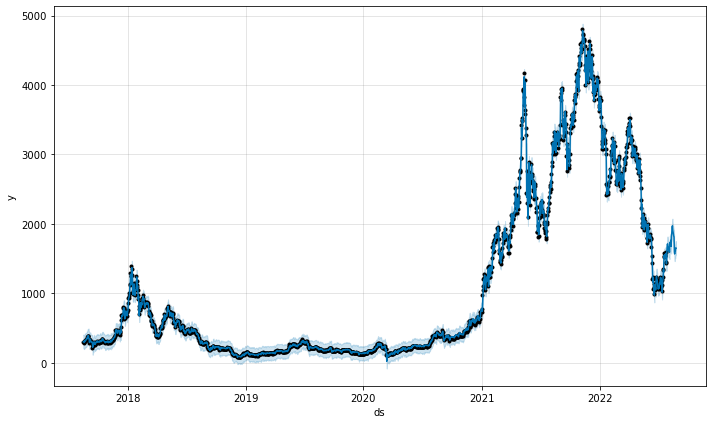

In [268]:
trainF = m.plot(forecast, uncertainty=True)

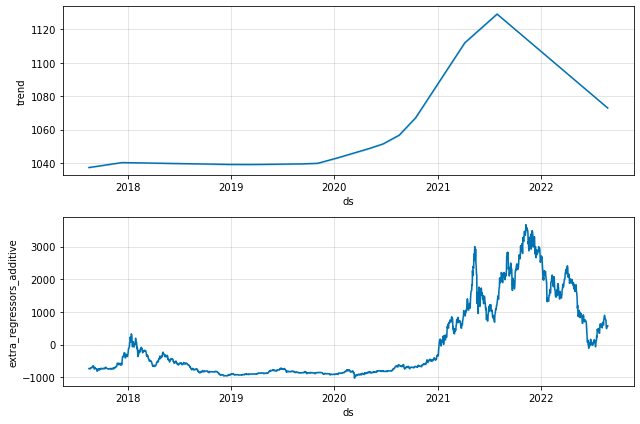

In [269]:
comp = m.plot_components(forecast)

#### 6. Test evaluation 

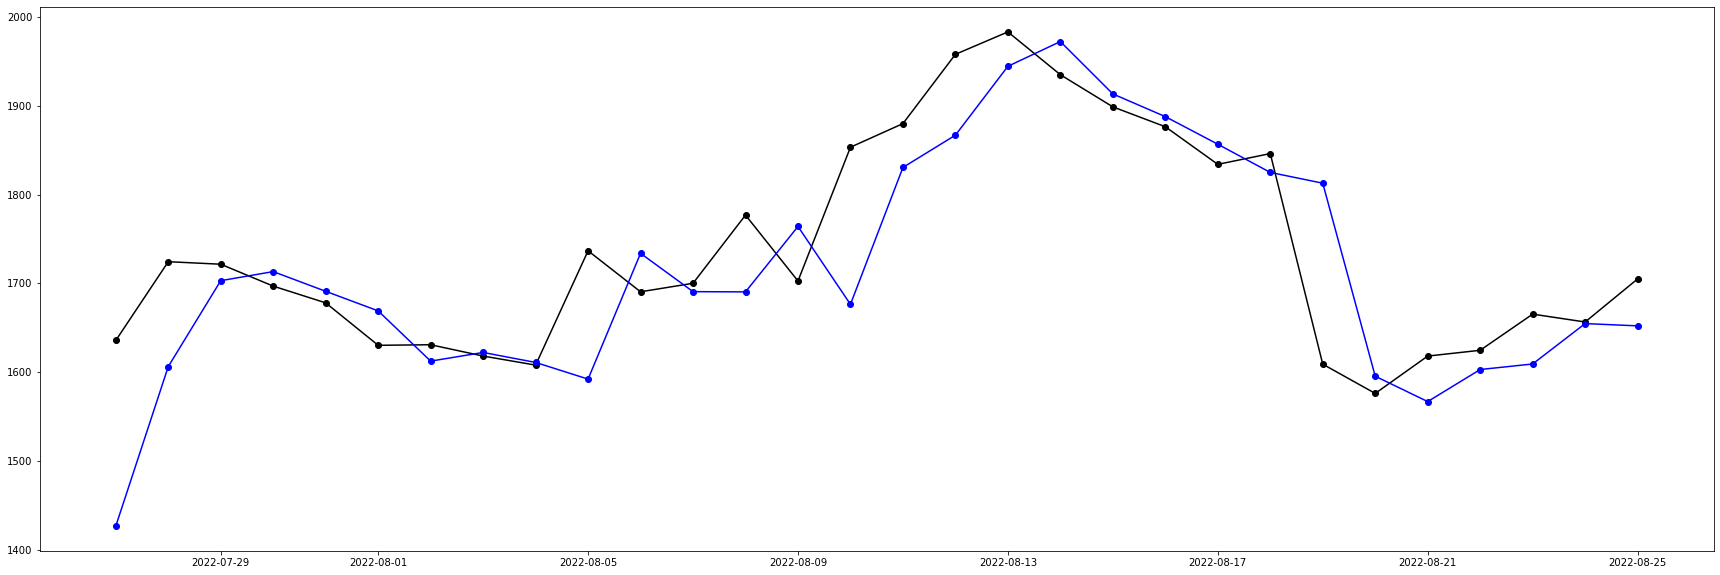

In [270]:
pred = forecast.iloc[-30:, :].sort_values(by='ds', ascending=False)['yhat']
fig = plt.figure(figsize=(30, 10))
plt.plot(test['ds'], test['y'], '-o', color='black')
plt.plot(test['ds'], pred, '-o', color='blue')
plt.show()